In [23]:
import pandas as pd
import numpy as np


# Importing data from sqlworkbench

In [24]:
from sqlalchemy import create_engine
# MySQL connection credentials
username = "root"
password = "root123"
host = "localhost"
port = 3306
database = "hr(attrition)"  # your database name

# Correct SQLAlchemy engine (no backticks in URL)
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")
# retriving data 
df = pd.read_sql("SELECT * FROM employeeattrition_main", con=engine)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobLevel,JobRole,JobSatisfaction,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Female,2,Sales Executive,4,...,Yes,11,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,3,Male,2,Research Scientist,2,...,No,23,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,4,Male,1,Laboratory Technician,3,...,Yes,15,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Female,1,Research Scientist,3,...,Yes,11,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Male,1,Laboratory Technician,2,...,No,12,4,6,3,3,2,2,2,2


In [25]:
# Understanding the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   EnvironmentSatisfaction   1470 non-null   int64 
 6   Gender                    1470 non-null   object
 7   JobLevel                  1470 non-null   int64 
 8   JobRole                   1470 non-null   object
 9   JobSatisfaction           1470 non-null   int64 
 10  MonthlyIncome             1470 non-null   int64 
 11  NumCompaniesWorked        1470 non-null   int64 
 12  OverTime                  1470 non-null   object
 13  PercentSalaryHike         1470 non-null   int64 
 14  RelationshipSatisfaction

In [26]:
df.describe()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.721769,2.063946,2.728571,6502.931293,2.693197,15.209524,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.093082,1.106940,1.102846,4707.956783,2.498009,3.659938,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [27]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,Gender,JobRole,OverTime
count,1470,1470,1470,1470,1470,1470
unique,2,3,3,2,9,2
top,No,Travel_Rarely,Research & Development,Male,Sales Executive,No
freq,1233,1043,961,882,326,1054


# Handiling missing values

In [28]:
df.isnull()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobLevel,JobRole,JobSatisfaction,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
EnvironmentSatisfaction     0
Gender                      0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [30]:
df.dropna(inplace=True)

# Handiling duplicates

In [31]:
df.duplicated

<bound method DataFrame.duplicated of       Age Attrition     BusinessTravel              Department  \
0      41       Yes      Travel_Rarely                   Sales   
1      49        No  Travel_Frequently  Research & Development   
2      37       Yes      Travel_Rarely  Research & Development   
3      33        No  Travel_Frequently  Research & Development   
4      27        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
1465   36        No  Travel_Frequently  Research & Development   
1466   39        No      Travel_Rarely  Research & Development   
1467   27        No      Travel_Rarely  Research & Development   
1468   49        No  Travel_Frequently                   Sales   
1469   34        No      Travel_Rarely  Research & Development   

      DistanceFromHome  EnvironmentSatisfaction  Gender  JobLevel  \
0                    1                        2  Female         2   
1                    8         

In [32]:
df.duplicated().sum()

np.int64(0)

In [33]:
df[df.duplicated()]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobLevel,JobRole,JobSatisfaction,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [34]:
#Removing duplicates
df.drop_duplicates(inplace=True)

# Correcting data Types

In [35]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
EnvironmentSatisfaction      int64
Gender                      object
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
RelationshipSatisfaction     int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [36]:
df['Attrition']=df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime']=df['OverTime'].map({'Yes': 1, 'No': 0})

In [37]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobLevel,JobRole,JobSatisfaction,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Female,2,Sales Executive,4,...,1,11,1,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,3,Male,2,Research Scientist,2,...,0,23,4,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,4,Male,1,Laboratory Technician,3,...,1,15,2,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Female,1,Research Scientist,3,...,1,11,3,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Male,1,Laboratory Technician,2,...,0,12,4,6,3,3,2,2,2,2


In [40]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
EnvironmentSatisfaction     0
Gender                      0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [41]:
df['Department']=df['Department'].astype('category')

# Outlier detection and treatment

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age'>

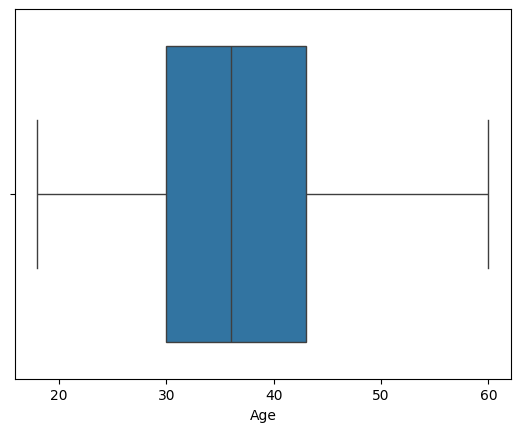

In [44]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='MonthlyIncome'>

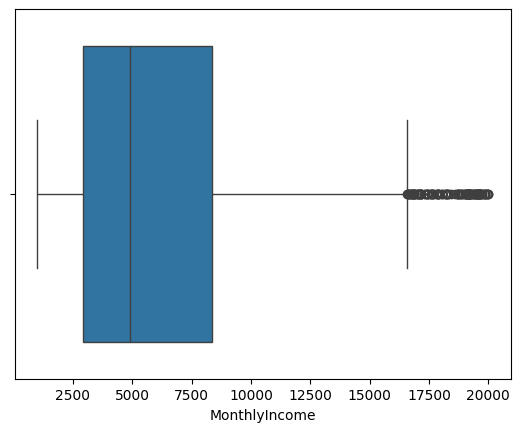

In [45]:
sns.boxplot(x=df['MonthlyIncome'])

In [48]:
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['MonthlyIncome'] < lower_bound) | (df['MonthlyIncome'] > upper_bound)]
print(outliers['MonthlyIncome'])
print(len(outliers))


25      19094
29      18947
45      19545
62      18740
105     18844
        ...  
1374    17875
1377    19161
1401    19636
1437    19431
1443    18880
Name: MonthlyIncome, Length: 114, dtype: int64
114


In [52]:
list(df.columns)

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'Gender',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [61]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Column: {col}, Outliers found: {len(outliers)}")

    if not outliers.empty:
        print("  Min outlier value:", outliers[col].min())
        print("  Max outlier value:", outliers[col].max())
    else:
        print("  No outliers found")
    print("-" * 40)


Column: Age, Outliers found: 0
  No outliers found
----------------------------------------
Column: Attrition, Outliers found: 237
  Min outlier value: 1
  Max outlier value: 1
----------------------------------------
Column: DistanceFromHome, Outliers found: 0
  No outliers found
----------------------------------------
Column: EnvironmentSatisfaction, Outliers found: 0
  No outliers found
----------------------------------------
Column: JobLevel, Outliers found: 0
  No outliers found
----------------------------------------
Column: JobSatisfaction, Outliers found: 0
  No outliers found
----------------------------------------
Column: MonthlyIncome, Outliers found: 114
  Min outlier value: 16595
  Max outlier value: 19999
----------------------------------------
Column: NumCompaniesWorked, Outliers found: 52
  Min outlier value: 9
  Max outlier value: 9
----------------------------------------
Column: OverTime, Outliers found: 0
  No outliers found
------------------------------------

np.int64(0)